# Problem 2

## Problem Description
Here, you will perform *weighted* KNN regression. 

After you write your own code for weighted KNN regression, you will also try out sklearn's built-in KNN regressor.

Fill out the notebook as instructed, making the requested plots and printing necessary values. 

#### Summary of deliverables:
Functions:
- `weighted_knn(w1, w2, k)`

Plots:
- 3 plots of by-hand KNN results
- 3 plots of sklearn.


Ignoring fixed y limits to fulfill fixed data aspect with adjustable data limits.


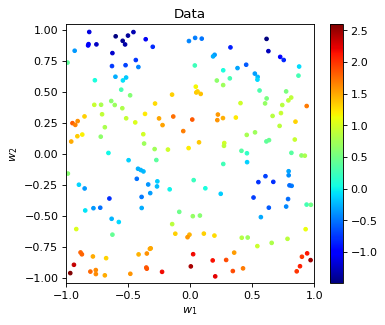

In [29]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsRegressor

# Data generation -- don't change
np.random.seed(42)
N = 200
w1_data = np.random.uniform(-1,1,N)
w2_data = np.random.uniform(-1,1,N)
L_data = np.cos(4*w1_data) + np.sin(5*w2_data) + 2*w1_data**2 - w2_data/2
# (end of data generation)

plt.figure(figsize=(5,4.2),dpi=80)
plt.scatter(w1_data,w2_data,s=10,c=L_data,cmap="jet")
plt.colorbar()
plt.axis("equal")
plt.xlabel("$w_1$")
plt.ylabel("$w_2$")
plt.xlim(-1,1)
plt.ylim(-1,1)
plt.title("Data")
plt.show()


## Weighted KNN function

Here, define a function, `weighted_knn(w1, w2, k)`, which takes in a point at [`w1`, `w2`] and a `k` value, and returns the weighted KNN prediction.  

- As in the lecture activity, data is in the variables `w1_data`, `w2_data`, and `L_data`.  

- You can create as many helper functions as you want

- The key difference between unweighted and weighted KNN is summarized below:

**Unweighted KNN**
1. Find the $k$ data points closest to the target point $w$ 
2. Get the output values at each of these points
3. Average these values together: this is the prediction at $w$

**Weighted KNN**
1. Find the $k$ data points closest to the target point $w$ 
2. Compute the proximity of each of these points as $\text{prox}_i = 1/(\text{distance}(w, w_i) + 1e-9)$
3. For each $w_i$, multiply $\text{prox}_i$ by the output value at $w_i$, and divide by the sum of all $k$ proximities
4. Add all $k$ of these results together: this is the prediction at $w$




In [30]:
def weighted_knn(w1, w2, k):
    distance = np.sqrt((w1 - w1_data)**2 + (w2 - w2_data)**2)
    k_nearest_indices = np.argpartition(distance, k)[:k]

    d = distance[k_nearest_indices]
    prox = 1 / (d + 1e-8)
    
    return np.sum(prox * L_data[k_nearest_indices]) / np.sum(prox)

## Plotting

Now create 3 plots showing KNN regressor predictions for k values [1, 5, 25].

You should plot a 50x50 grid of points on a grid for `w1` and `w2` values between -1 and 1. Consult the lecture activity for how to do this.

We recommend creating a function, e.g. `plot(k)`, so that you need to rewrite less code.

Ignoring fixed x limits to fulfill fixed data aspect with adjustable data limits.


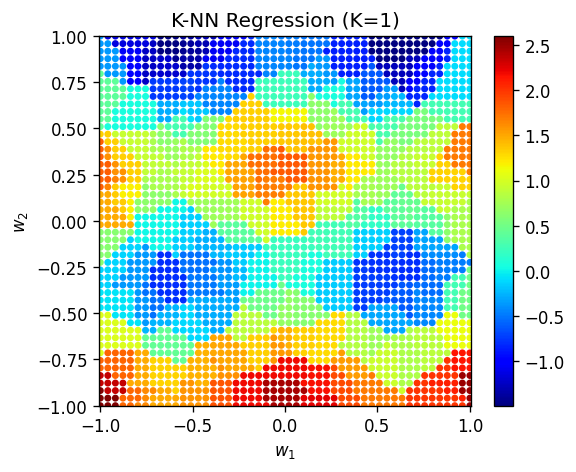

Ignoring fixed x limits to fulfill fixed data aspect with adjustable data limits.


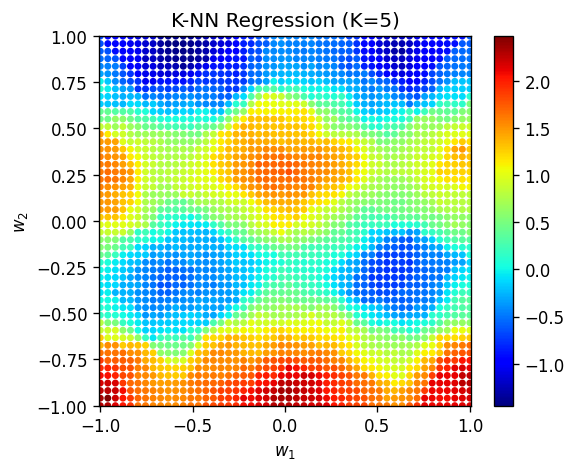

Ignoring fixed x limits to fulfill fixed data aspect with adjustable data limits.


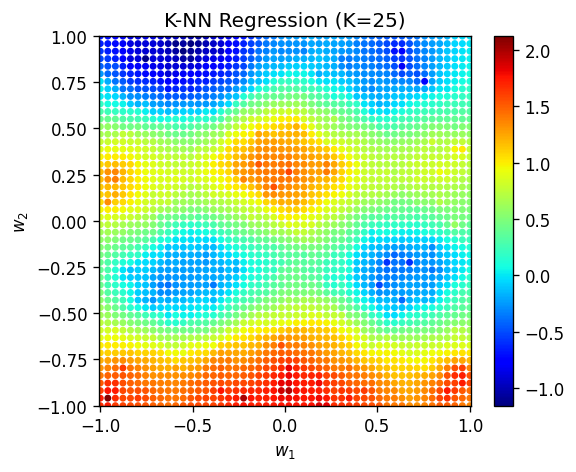

In [31]:
def plot(k):
    w1_vals = np.linspace(-1, 1, 50)
    w2_vals = np.linspace(-1, 1, 50)
    
    w1s, w2s = np.meshgrid(w1_vals, w2_vals)
    w1_grid, w2_grid = w1s.flatten(), w2s.flatten()
    
    L_grid = np.zeros_like(w1_grid)
    for i in range(len(L_grid)):
        L_grid[i] = weighted_knn(w1_grid[i], w2_grid[i], k)

    plt.figure(figsize=(5,4),dpi=120)
    plt.scatter(w1_grid,w2_grid,s=10,c=L_grid,cmap="jet")
    plt.colorbar()
    plt.axis("equal")
    plt.xlabel("$w_1$")
    plt.ylabel("$w_2$")
    plt.xlim(-1,1)
    plt.ylim(-1,1)
    plt.title(f"K-NN Regression (K={k})")
    plt.show()

plot(1)
plot(5)
plot(25)


## Using SciKit-Learn

We can also use sklearn's `KNeighborsRegressor()`, which is a very efficient implementation of KNN regression.

The code to do this has been done for one case below. First, make note of how this is done. 

In [32]:
model = KNeighborsRegressor(n_neighbors = 1, weights="distance")
X = np.vstack([w1_data,w2_data]).T
model.fit(X, L_data)

# Get a prediction at a point (0, 0):
print(model.predict(np.array([[0,0]])))


[1.19743607]


Now create 3 plots for the same values of k as before, using this KNN implementation instead. You can make sure these are visually the same as your from-scratch KNN regressor.

Ignoring fixed x limits to fulfill fixed data aspect with adjustable data limits.


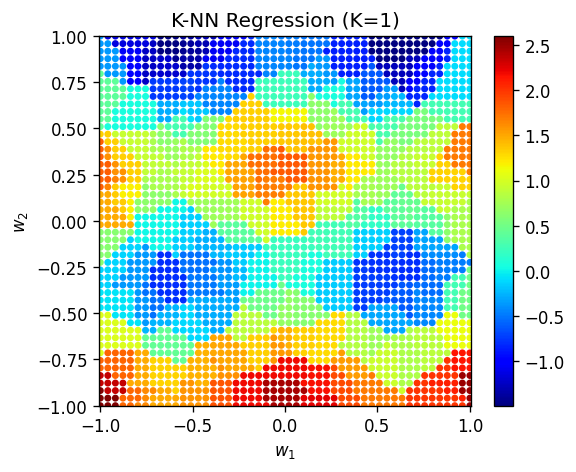

Ignoring fixed x limits to fulfill fixed data aspect with adjustable data limits.


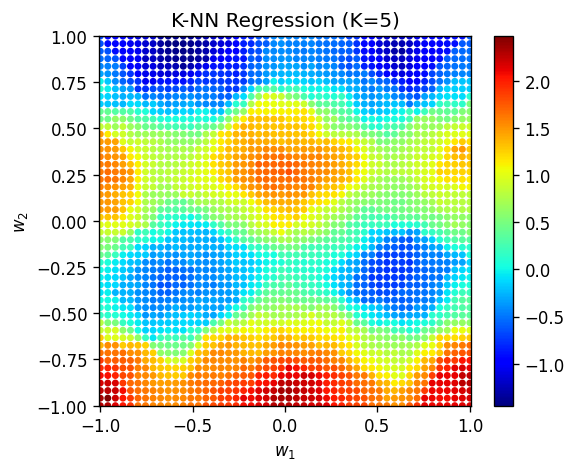

Ignoring fixed x limits to fulfill fixed data aspect with adjustable data limits.


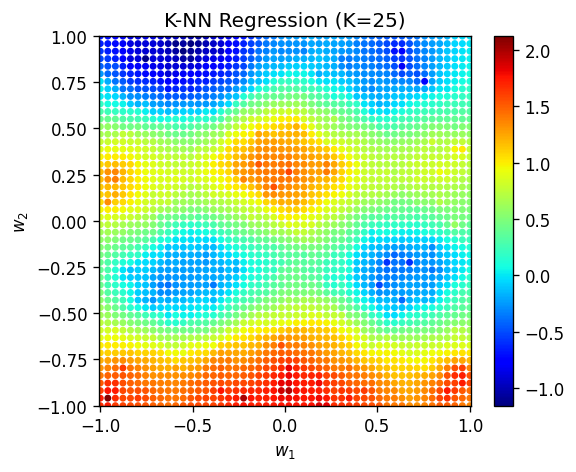

In [33]:
def plot_scikit(k):
    model = KNeighborsRegressor(n_neighbors = k, weights="distance")
    X = np.vstack([w1_data,w2_data]).T
    model.fit(X, L_data)

    w1_vals = np.linspace(-1, 1, 50)
    w2_vals = np.linspace(-1, 1, 50)
    
    w1s, w2s = np.meshgrid(w1_vals, w2_vals)
    w1_grid, w2_grid = w1s.flatten(), w2s.flatten()
    
    grid_points = np.column_stack((w1_grid, w2_grid))
    L_grid = model.predict(grid_points)            

    plt.figure(figsize=(5,4),dpi=120)
    plt.scatter(w1_grid,w2_grid,s=10,c=L_grid,cmap="jet")
    plt.colorbar()
    plt.axis("equal")
    plt.xlabel("$w_1$")
    plt.ylabel("$w_2$")
    plt.xlim(-1,1)
    plt.ylim(-1,1)
    plt.title(f"K-NN Regression (K={k})")
    plt.show()

plot_scikit(1)
plot_scikit(5)
plot_scikit(25)    